In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random as rnd

In [2]:
df = pd.read_csv('default of credit card clients-2.csv', index_col=0)

In [3]:
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [4]:
# very clean
df.isna().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [5]:
df.dtypes

LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [6]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


0    23364
1     6636
Name: default payment next month, dtype: int64


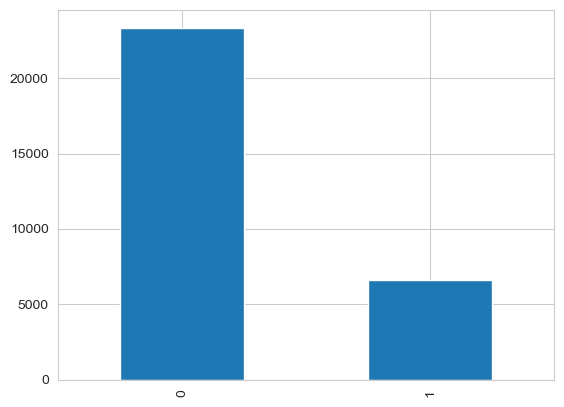

In [7]:
# Imbalanced, We should probably get an even split when training
df['default payment next month'].value_counts().plot.bar()
print(df['default payment next month'].value_counts())

In [8]:
# Balance the df
balanced_df = pd.concat([df[df['default payment next month'] == 0].sample(6636), df[df['default payment next month'] == 1]]).reset_index(drop=True)

<Axes: >

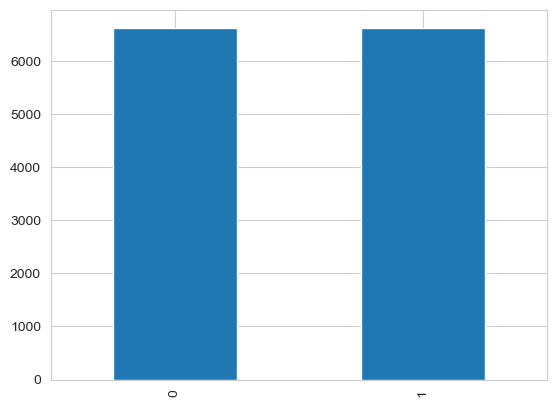

In [9]:
balanced_df['default payment next month'].value_counts(()).plot.bar()

In [10]:
balanced_df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,360000,1,2,1,45,-1,-1,-1,-1,-1,...,836,986,986,836,836,836,986,986,611,0
1,600000,2,2,1,46,-2,-2,-2,-2,-2,...,1952,2182,2305,1652,3480,1957,2186,2310,7511,0
2,180000,2,1,1,47,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
3,10000,1,3,1,37,0,0,0,0,0,...,5275,0,0,2248,1120,375,0,0,0,0
4,200000,2,3,2,37,-2,-2,-2,-2,-2,...,807,2183,210,8576,4850,1047,2183,210,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13267,210000,1,2,1,34,3,2,2,2,2,...,2500,2500,2500,0,0,0,0,0,0,1
13268,80000,1,2,2,34,2,2,2,2,2,...,77519,82607,81158,7000,3500,0,7000,0,4000,1
13269,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
13270,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


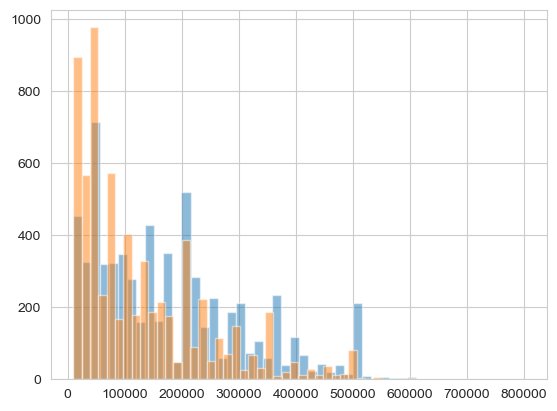

In [11]:
plt.hist(x=balanced_df[balanced_df['default payment next month'] == 0].LIMIT_BAL, bins=50, alpha=0.5);
plt.hist(x=balanced_df[balanced_df['default payment next month'] == 1].LIMIT_BAL, bins=50, alpha=0.5);

In [12]:
balanced_df[balanced_df['default payment next month'] == 0].mean()

LIMIT_BAL                     179597.950573
SEX                                1.627788
EDUCATION                          1.842676
MARRIAGE                           1.558921
AGE                               35.343731
PAY_0                             -0.207957
PAY_2                             -0.305304
PAY_3                             -0.332278
PAY_4                             -0.378240
PAY_5                             -0.408228
PAY_6                             -0.414256
BILL_AMT1                      51770.976040
BILL_AMT2                      49291.194093
BILL_AMT3                      46753.481917
BILL_AMT4                      42421.440476
BILL_AMT5                      39656.173146
BILL_AMT6                      38131.936558
PAY_AMT1                        6172.193942
PAY_AMT2                        6794.139994
PAY_AMT3                        5631.746835
PAY_AMT4                        5673.686106
PAY_AMT5                        5337.420283
PAY_AMT6                        

In [13]:
balanced_df[balanced_df['default payment next month'] == 1].mean()

LIMIT_BAL                     130109.656420
SEX                                1.567058
EDUCATION                          1.894665
MARRIAGE                           1.528029
AGE                               35.725738
PAY_0                              0.668174
PAY_2                              0.458258
PAY_3                              0.362116
PAY_4                              0.254521
PAY_5                              0.167872
PAY_6                              0.112116
BILL_AMT1                      48509.162297
BILL_AMT2                      47283.617842
BILL_AMT3                      45181.598855
BILL_AMT4                      42036.950573
BILL_AMT5                      39540.190476
BILL_AMT6                      38271.435503
PAY_AMT1                        3397.044153
PAY_AMT2                        3388.649638
PAY_AMT3                        3367.351567
PAY_AMT4                        3155.626733
PAY_AMT5                        3219.139542
PAY_AMT6                        